In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [5]:
X = data.data
y = data.target

In [35]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=20)
model.fit(X)

KMeans(n_clusters=20)

In [36]:
# model.labels_

In [37]:
# model.cluster_centers_

In [38]:
new_data = np.random.random((1, 30))
model.predict(new_data)

array([9], dtype=int32)

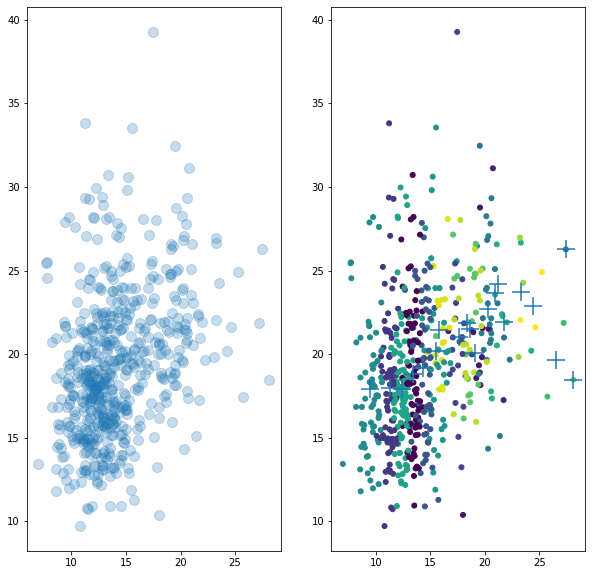

In [39]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
ax1.scatter(X[:, 0], X[:, 1], alpha=0.25, s=100)
ax2.scatter(X[:, 0], X[:, 1], c=model.labels_, s=25)
ax2.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], marker="+", s=300)
plt.show()


In [48]:

K = list(range(1, 5))

distorsions = []
for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X)
    distorsions.append(model.inertia_)

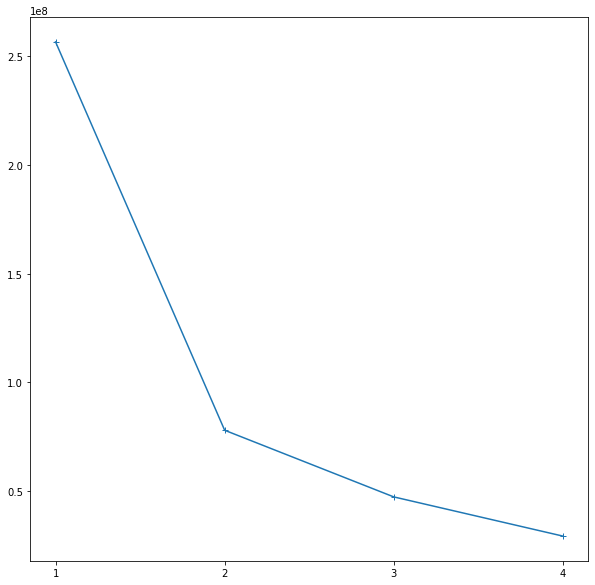

In [49]:
_ = plt.figure(figsize=(10, 10))
plt.plot(K, distorsions, marker="+")
plt.xticks(K)
plt.show()

In [45]:
from sklearn.datasets import load_wine

X_wine, y_wine = load_wine(return_X_y=True)


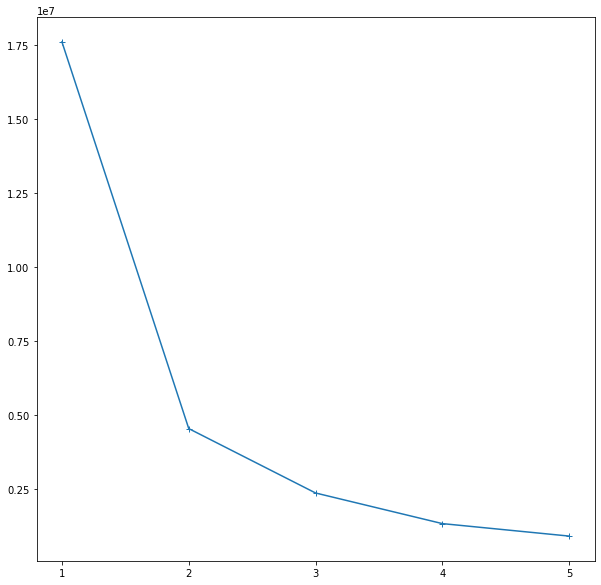

In [47]:
K = list(range(1, 6))

distorsions = []
for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X_wine)
    distorsions.append(model.inertia_)

_ = plt.figure(figsize=(10, 10))
plt.plot(K, distorsions, marker="+")
plt.xticks(K)
plt.show()

In [61]:
# No SKLEARN (2D data)
X = np.random.random((100, 2))

K = 3
centroids = np.random.random((K, 2))
labels = np.zeros(X.shape[0])
not_the_same = True
n_iter = 100
while not_the_same and n_iter > 0:
    # allocate each data point to a given cluster
    for i, xi in enumerate(X):
        distance_to_cluster = float('inf')
        for j, ci in enumerate(centroids):
            d = np.sqrt((ci[0] - xi[0])**2 + (ci[1] - xi[1])**2) # if 2D
            # d = np.linalg.norm(ci - xi) # if > 2D

            if distance_to_cluster > d:
                distance_to_cluster = d 
                labels[i] = j
    
    # update cluster center based on the latest data allocation to cluster
    new_centroids = []
    for li in np.unique(labels):
        centroid_data = X[np.where(labels == li)]
        centroid_x = np.mean(centroid_data[:, 0])
        centroid_y = np.mean(centroid_data[:, 1])
        new_centroids.append([centroid_x, centroid_y])
    new_centroids = np.array(new_centroids)

    # check if we can stop 
    not_the_same = np.count_nonzero(centroids-new_centroids) != 0
    
    centroids = new_centroids

    n_iter = n_iter - 1


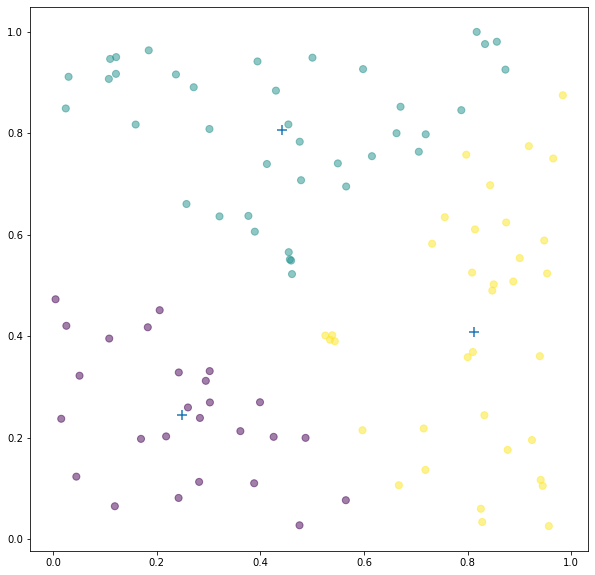

In [62]:
_ = plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, s=50, c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker="+", s=100)
plt.show()